In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector, plot_histogram
from qiskit.compiler import transpile, assemble

from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy

import matplotlib 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


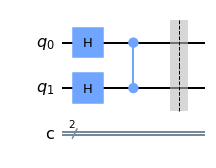

In [2]:
n = 2 
qc = QuantumCircuit(n, n)
qc.h(range(n))
qc.cz(0,1)
qc.barrier()
qc.draw('mpl')

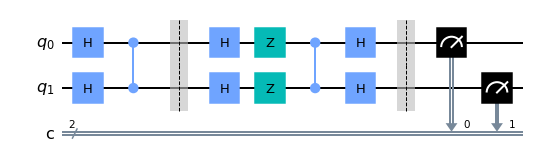

In [3]:
qc.h(range(n))
qc.z(range(n))
qc.cz(0,1)
qc.h(range(n))
qc.barrier()
qc.measure(range(n),range(n))
qc.draw('mpl')

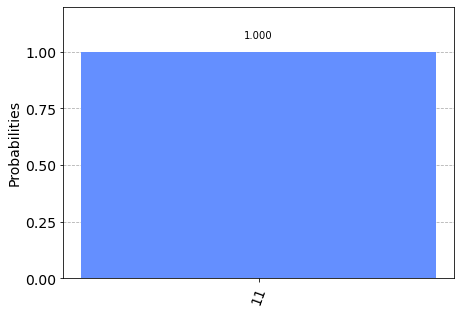

In [4]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim, shots = 1)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
plot_histogram(counts)

In [5]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_lima


In [6]:
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
qobj = assemble(transpiled_qc, shots=shots)
job = backend.run(qobj)
job_monitor(job)

<ipython-input-6-c72f574f7484>:4: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


Job Status: job has successfully run


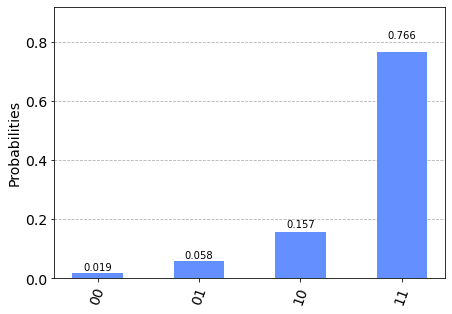

In [7]:
counts = job.result().get_counts()
plot_histogram(counts)